<a href="https://colab.research.google.com/github/Rajeeb321123/Learning_R/blob/master/HomeWork_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1

In [ ]:
install.packages('reshape2')
library(reshape2)
attach(tips)

print(tips[1:40,])

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




   total_bill  tip    sex smoker day   time size
1       16.99 1.01 Female     No Sun Dinner    2
2       10.34 1.66   Male     No Sun Dinner    3
3       21.01 3.50   Male     No Sun Dinner    3
4       23.68 3.31   Male     No Sun Dinner    2
5       24.59 3.61 Female     No Sun Dinner    4
6       25.29 4.71   Male     No Sun Dinner    4
7        8.77 2.00   Male     No Sun Dinner    2
8       26.88 3.12   Male     No Sun Dinner    4
9       15.04 1.96   Male     No Sun Dinner    2
10      14.78 3.23   Male     No Sun Dinner    2
11      10.27 1.71   Male     No Sun Dinner    2
12      35.26 5.00 Female     No Sun Dinner    4
13      15.42 1.57   Male     No Sun Dinner    2
14      18.43 3.00   Male     No Sun Dinner    4
15      14.83 3.02 Female     No Sun Dinner    2
16      21.58 3.92   Male     No Sun Dinner    2
17      10.33 1.67 Female     No Sun Dinner    3
18      16.29 3.71   Male     No Sun Dinner    3
19      16.97 3.50 Female     No Sun Dinner    3
20      20.65 3.35  

## Question_1: Produce a one-way frequency distribution of the day when the customers dined at the restaurant.


In [ ]:
# Solution_Question_1
DAYS = factor(tips$day, labels = c('Sun','Thur','Fri','Sat'))
print(table(DAYS))

DAYS
 Sun Thur  Fri  Sat 
  19   87   76   62 


## Question_2: Produce a two-way frequency distribution of the day and time when the customers dined at the restaurant.


In [ ]:
# Solution_Question_2
TIME = factor(tips$time, labels= c('Lunch','Dinner'))
print(table(DAYS, TIME))

      TIME
DAYS   Lunch Dinner
  Sun     12      7
  Thur    87      0
  Fri     76      0
  Sat      1     61


## Question_3: Produce a three-way relative frequency distribution of the paying customers’ gender and if they were at a smoking table, separated by the day on which they dined at the restaurant (i.e. produce a two-way table for each day).


In [ ]:
# Solution_Question_3
GENDERS = factor(tips$sex,labels = c('MALE','FEMALE'))
SMOKERS = factor(tips$smoker, labels = c('Yes', 'No'))

print(table(GENDERS, SMOKERS, DAYS)/length(DAYS))

, , DAYS = Sun

        SMOKERS
GENDERS          Yes          No
  MALE   0.008196721 0.028688525
  FEMALE 0.008196721 0.032786885

, , DAYS = Thur

        SMOKERS
GENDERS          Yes          No
  MALE   0.053278689 0.061475410
  FEMALE 0.131147541 0.110655738

, , DAYS = Fri

        SMOKERS
GENDERS          Yes          No
  MALE   0.057377049 0.016393443
  FEMALE 0.176229508 0.061475410

, , DAYS = Sat

        SMOKERS
GENDERS          Yes          No
  MALE   0.102459016 0.028688525
  FEMALE 0.081967213 0.040983607



## Question_4: Produce a relative frequency bar plot of the day of the week when the customers dined at the restaurant.


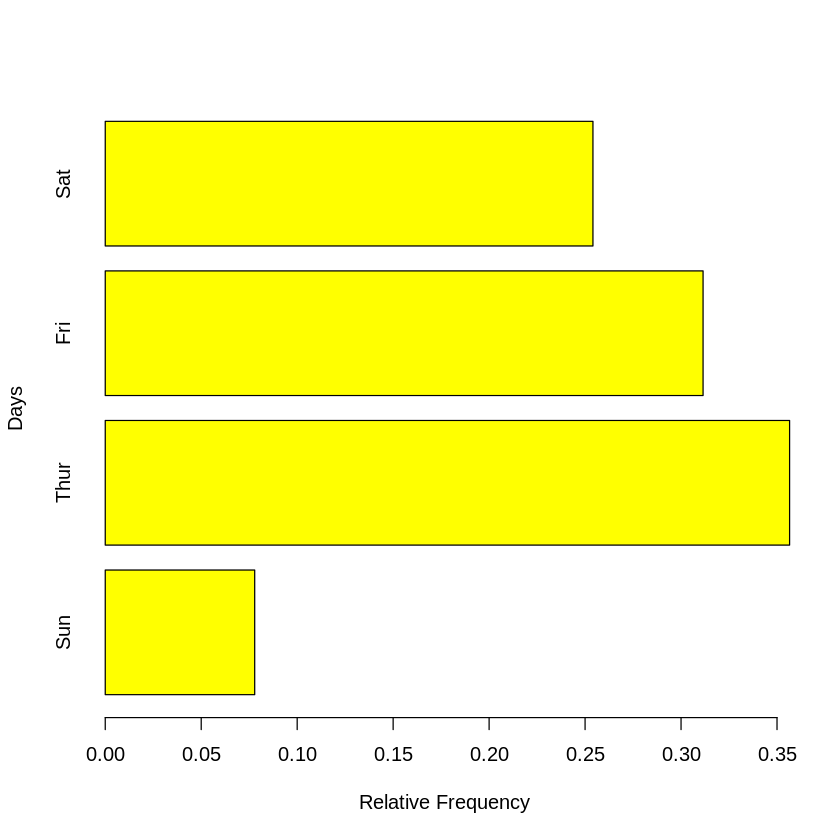

In [ ]:
# Solution_Question_4
barplot(table(DAYS)/length(DAYS),ylab="Days",xlab="Relative Frequency",col="yellow",horiz = T)

## Question_5: Produce a two-way grouped bar plot of sex and day of the week. Use the horizontal axis to represent day of the week.


[1] "Genders are: MALE and FEMALE"


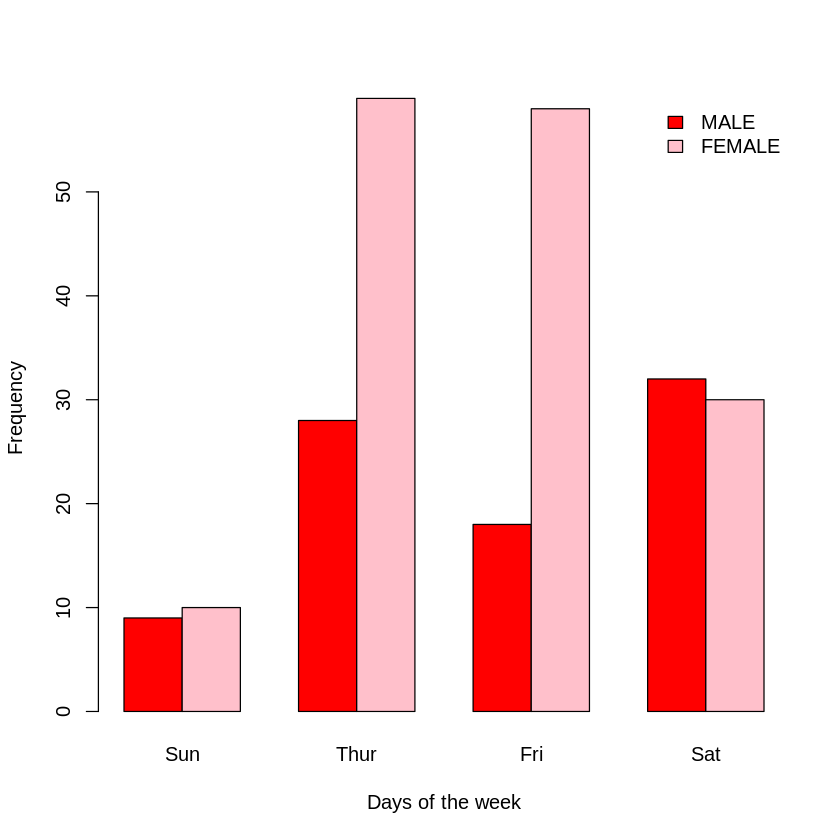

In [ ]:
# Solution_Question_5
customer.table <- table(GENDERS,DAYS)
print(paste("Genders are:", paste(rownames(customer.table), collapse = " and "))) # Use paste to combine strings
barplot(customer.table,
        xlab ="Days of the week",
        ylab="Frequency",
        col=c("red", "pink"),
        beside =T,
        legend=rownames(customer.table),
        args.legend=list(x = "topright",
        bty = "n"))

## Question_6: Produce a table of the total bill cost using seven classes. In the table, include the frequency distribution, relative frequency distribution, cumulative frequency distribution, and cumulative relative frequency distribution.


In [ ]:
print(tips[1:10,])

   total_bill  tip    sex smoker day   time size
1       16.99 1.01 Female     No Sun Dinner    2
2       10.34 1.66   Male     No Sun Dinner    3
3       21.01 3.50   Male     No Sun Dinner    3
4       23.68 3.31   Male     No Sun Dinner    2
5       24.59 3.61 Female     No Sun Dinner    4
6       25.29 4.71   Male     No Sun Dinner    4
7        8.77 2.00   Male     No Sun Dinner    2
8       26.88 3.12   Male     No Sun Dinner    4
9       15.04 1.96   Male     No Sun Dinner    2
10      14.78 3.23   Male     No Sun Dinner    2


In [ ]:
# Remove rows with any NA values
tips_clean <- na.omit(tips)
print(paste("The number for tips_clean", nrow(tips_clean),"and for tips:", nrow(tips)))

[1] "The number for tips_clean 244 and for tips: 244"


In [ ]:
min_total_bill <- min(tips_clean$total_bill)
max_total_bill <- max(tips_clean$total_bill)
print(paste(max_total_bill, min_total_bill))

[1] "50.81 3.07"


In [ ]:
number_of_classes <- 7
#round up the number so max value can be included in classes
class_width <- ceiling((max_total_bill - min_total_bill)/number_of_classes)
print(class_width)

[1] 7


In [ ]:
numeric(number_of_classes)

[1] 0 0 0 0 0 0 0

In [ ]:
1:number_of_classes

[1] 1 2 3 4 5 6 7

In [ ]:
# Initialize the iterable numbers for for-loop below
limits <- numeric(number_of_classes)

# For loop : creating classes programmatically
for (i in 1:number_of_classes) {
  if (i == 1) {
    limits[i] <- min_total_bill
  }
  else{
    limits[i] <- limits[i-1] + class_width
    print(i)
  }
}

#adding the last value in classes
LIMIT = c(limits, limits[number_of_classes] + class_width)
print(LIMIT)

[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1]  3.07 10.07 17.07 24.07 31.07 38.07 45.07 52.07


In [ ]:
## both way below are same
# total_bill_numeric_vector <- na.omit(total_bill)
# total_bill_numeric_vector

total_bill_numeric_vector <-  tips_clean$total_bill
print(total_bill_numeric_vector)

  [1] 16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 [13] 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 [25] 19.82 17.81 13.37 12.69 21.70 19.65  9.55 18.35 15.06 20.69 17.78 24.06
 [37] 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.40 18.29 22.23 32.40
 [49] 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 [61] 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 [73] 26.86 25.28 14.73 10.51 17.92 27.20 22.76 17.29 19.44 16.66 10.07 32.68
 [85] 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 [97] 27.28 12.03 21.01 12.46 11.35 15.38 44.30 22.42 20.92 15.36 20.49 25.21
[109] 18.24 14.31 14.00  7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
[121] 11.69 13.42 14.26 15.95 12.48 29.80  8.52 14.52 11.38 22.82 19.08 20.27
[133] 11.17 12.26 18.26  8.51 10.33 14.15 16.00 13.16 17.47 34.30 41.19 27.05
[145] 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.5

In [ ]:
total_bill.assign <- cut(total_bill_numeric_vector, LIMIT, right=FALSE ,dig.lab=5)
print(total_bill.assign)

  [1] [10.07,17.07) [10.07,17.07) [17.07,24.07) [17.07,24.07) [24.07,31.07)
  [6] [24.07,31.07) [3.07,10.07)  [24.07,31.07) [10.07,17.07) [10.07,17.07)
 [11] [10.07,17.07) [31.07,38.07) [10.07,17.07) [17.07,24.07) [10.07,17.07)
 [16] [17.07,24.07) [10.07,17.07) [10.07,17.07) [10.07,17.07) [17.07,24.07)
 [21] [17.07,24.07) [17.07,24.07) [10.07,17.07) [38.07,45.07) [17.07,24.07)
 [26] [17.07,24.07) [10.07,17.07) [10.07,17.07) [17.07,24.07) [17.07,24.07)
 [31] [3.07,10.07)  [17.07,24.07) [10.07,17.07) [17.07,24.07) [17.07,24.07)
 [36] [17.07,24.07) [10.07,17.07) [10.07,17.07) [17.07,24.07) [31.07,38.07)
 [41] [10.07,17.07) [17.07,24.07) [10.07,17.07) [3.07,10.07)  [24.07,31.07)
 [46] [17.07,24.07) [17.07,24.07) [31.07,38.07) [24.07,31.07) [17.07,24.07)
 [51] [10.07,17.07) [10.07,17.07) [31.07,38.07) [3.07,10.07)  [24.07,31.07)
 [56] [17.07,24.07) [31.07,38.07) [24.07,31.07) [10.07,17.07) [45.07,52.07)
 [61] [17.07,24.07) [10.07,17.07) [10.07,17.07) [17.07,24.07) [17.07,24.07)
 [66] [17.07

In [ ]:
total_bill.freq <- cbind(table(total_bill.assign))
print(total_bill.freq)

              [,1]
[3.07,10.07)    17
[10.07,17.07)   96
[17.07,24.07)   69
[24.07,31.07)   34
[31.07,38.07)   15
[38.07,45.07)    8
[45.07,52.07)    5


In [ ]:
total_bill.relfreq <- cbind(table(total_bill.assign)/length(total_bill_numeric_vector))
print(total_bill.relfreq)

                    [,1]
[3.07,10.07)  0.06967213
[10.07,17.07) 0.39344262
[17.07,24.07) 0.28278689
[24.07,31.07) 0.13934426
[31.07,38.07) 0.06147541
[38.07,45.07) 0.03278689
[45.07,52.07) 0.02049180


In [ ]:
total_bill.cumfreq <- cumsum(cbind(total_bill.freq))
total_bill.cumrelfreq <- cumsum(total_bill.freq/length(total_bill_numeric_vector))
print(total_bill.cumfreq)
print(total_bill.cumrelfreq)

[1]  17 113 182 216 231 239 244
[1] 0.06967213 0.46311475 0.74590164 0.88524590 0.94672131 0.97950820 1.00000000


In [ ]:
combined_data <- cbind(total_bill.freq, total_bill.cumfreq, total_bill.relfreq, total_bill.cumrelfreq)
print(combined_data)

                 total_bill.cumfreq            total_bill.cumrelfreq
[3.07,10.07)  17                 17 0.06967213            0.06967213
[10.07,17.07) 96                113 0.39344262            0.46311475
[17.07,24.07) 69                182 0.28278689            0.74590164
[24.07,31.07) 34                216 0.13934426            0.88524590
[31.07,38.07) 15                231 0.06147541            0.94672131
[38.07,45.07)  8                239 0.03278689            0.97950820
[45.07,52.07)  5                244 0.02049180            1.00000000


In [ ]:
# Solution of Question_6
df <- data.frame(
  Frequency = total_bill.freq,
  Cu_frequency = total_bill.cumfreq,
  Rel_frequency = total_bill.relfreq,
  Cu_Rel_Frequency = total_bill.cumrelfreq
)
print(df)
# cumulative frequency is equal to total number of data so answer must be right

              Frequency Cu_frequency Rel_frequency Cu_Rel_Frequency
[3.07,10.07)         17           17    0.06967213       0.06967213
[10.07,17.07)        96          113    0.39344262       0.46311475
[17.07,24.07)        69          182    0.28278689       0.74590164
[24.07,31.07)        34          216    0.13934426       0.88524590
[31.07,38.07)        15          231    0.06147541       0.94672131
[38.07,45.07)         8          239    0.03278689       0.97950820
[45.07,52.07)         5          244    0.02049180       1.00000000


## Question_7: Produce a frequency histogram of the total bill cost using the class breaks in Question 6.

In [ ]:
print(total_bill_numeric_vector)

  [1] 16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 [13] 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 [25] 19.82 17.81 13.37 12.69 21.70 19.65  9.55 18.35 15.06 20.69 17.78 24.06
 [37] 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.40 18.29 22.23 32.40
 [49] 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 [61] 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 [73] 26.86 25.28 14.73 10.51 17.92 27.20 22.76 17.29 19.44 16.66 10.07 32.68
 [85] 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 [97] 27.28 12.03 21.01 12.46 11.35 15.38 44.30 22.42 20.92 15.36 20.49 25.21
[109] 18.24 14.31 14.00  7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
[121] 11.69 13.42 14.26 15.95 12.48 29.80  8.52 14.52 11.38 22.82 19.08 20.27
[133] 11.17 12.26 18.26  8.51 10.33 14.15 16.00 13.16 17.47 34.30 41.19 27.05
[145] 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.5

In [ ]:
print(LIMIT)

[1]  3.07 10.07 17.07 24.07 31.07 38.07 45.07 52.07


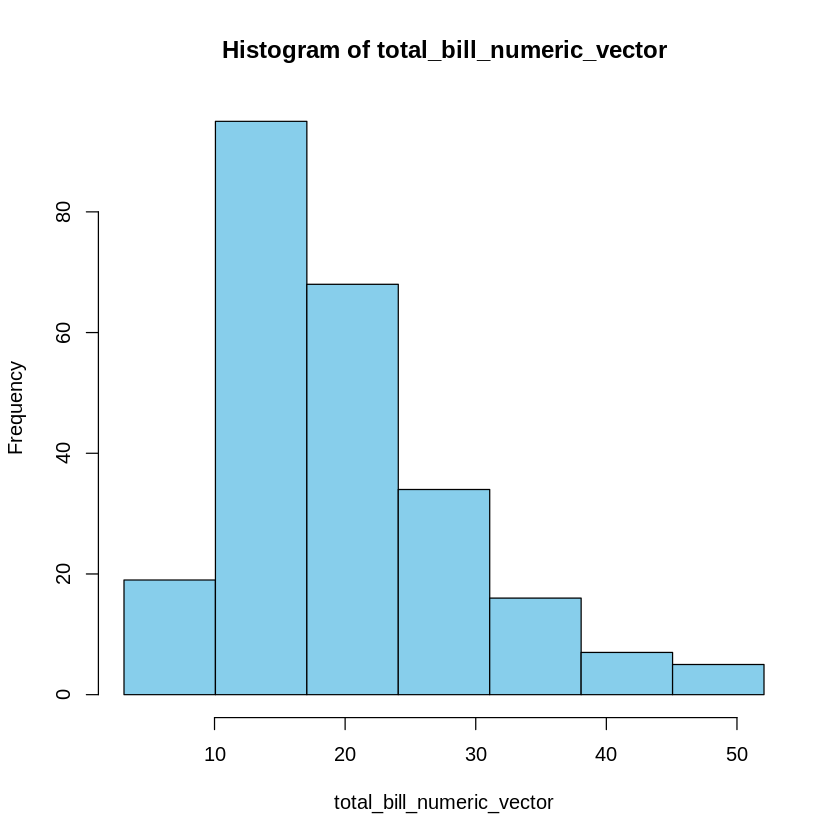

In [ ]:
# Solution of Question_7
hist(total_bill_numeric_vector, breaks = LIMIT, col = "skyblue")

## Question_8: Produce relative frequency histograms of the total bill cost separated by day using the class breaks in Question 6.  

In [ ]:
install.packages("lattice")
library(lattice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
print(total_bill_numeric_vector)

  [1] 16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 [13] 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 [25] 19.82 17.81 13.37 12.69 21.70 19.65  9.55 18.35 15.06 20.69 17.78 24.06
 [37] 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.40 18.29 22.23 32.40
 [49] 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 [61] 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 [73] 26.86 25.28 14.73 10.51 17.92 27.20 22.76 17.29 19.44 16.66 10.07 32.68
 [85] 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 [97] 27.28 12.03 21.01 12.46 11.35 15.38 44.30 22.42 20.92 15.36 20.49 25.21
[109] 18.24 14.31 14.00  7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
[121] 11.69 13.42 14.26 15.95 12.48 29.80  8.52 14.52 11.38 22.82 19.08 20.27
[133] 11.17 12.26 18.26  8.51 10.33 14.15 16.00 13.16 17.47 34.30 41.19 27.05
[145] 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.5

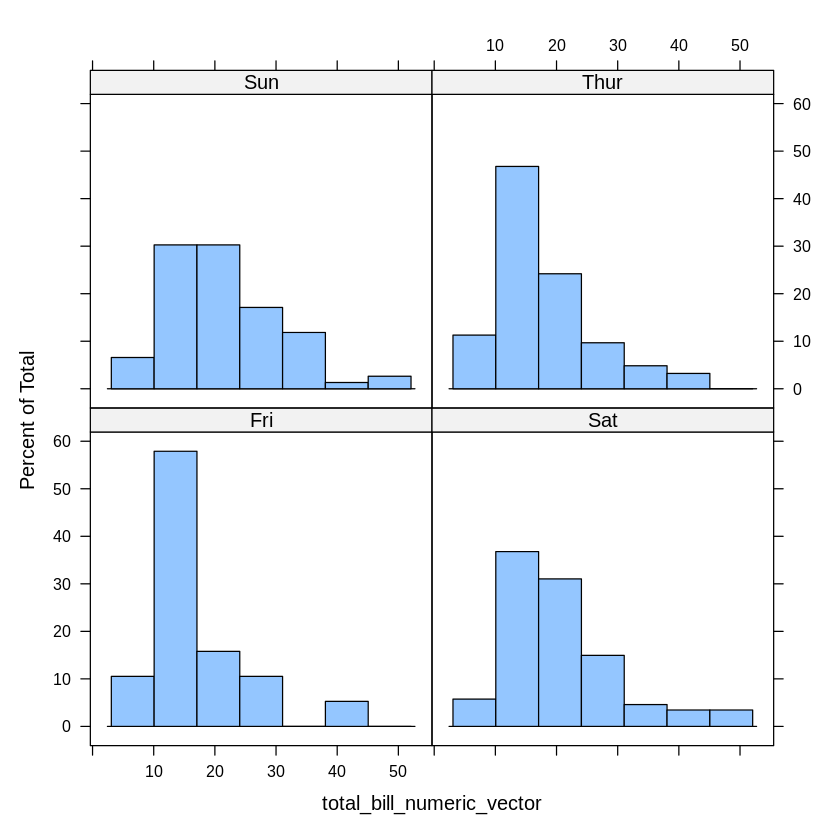

In [ ]:
# Solution_question_8
histogram(~total_bill_numeric_vector | day, breaks=LIMIT)

## Question_9: Produce a scatterplot showing the total bill cost on the horizontal axis and the tip amount on the vertical axis.

In [ ]:
tip <- na.omit(tip)

#or
# tip <- tips_clean$tip

In [ ]:
tip

[1]  1.01  1.66  3.50  3.31  3.61  4.71  2.00  3.12  1.96  3.23  1.71  5.00
 [13]  1.57  3.00  3.02  3.92  1.67  3.71  3.50  3.35  4.08  2.75  2.23  7.58
 [25]  3.18  2.34  2.00  2.00  4.30  3.00  1.45  2.50  3.00  2.45  3.27  3.60
 [37]  2.00  3.07  2.31  5.00  2.24  2.54  3.06  1.32  5.60  3.00  5.00  6.00
 [49]  2.05  3.00  2.50  2.60  5.20  1.56  4.34  3.51  3.00  1.50  1.76  6.73
 [61]  3.21  2.00  1.98  3.76  2.64  3.15  2.47  1.00  2.01  2.09  1.97  3.00
 [73]  3.14  5.00  2.20  1.25  3.08  4.00  3.00  2.71  3.00  3.40  1.83  5.00
 [85]  2.03  5.17  2.00  4.00  5.85  3.00  3.00  3.50  1.00  4.30  3.25  4.73
 [97]  4.00  1.50  3.00  1.50  2.50  3.00  2.50  3.48  4.08  1.64  4.06  4.29
[109]  3.76  4.00  3.00  1.00  4.00  2.55  4.00  3.50  5.07  1.50  1.80  2.92
[121]  2.31  1.68  2.50  2.00  2.52  4.20  1.48  2.00  2.00  2.18  1.50  2.83
[133]  1.50  2.00  3.25  1.25  2.00  2.00  2.00  2.75  3.50  6.70  5.00  5.00
[145]  2.30  1.50  1.36  1.63  1.73  2.00  2.50  2.00  2.74  2.00  2.00  5.14
[157]  5.00  3.75  2.61  2.00  3.50  2.50  2.00  2.00  3.00  3.48  2.24  4.50
[169]  1.61  2.00 10.00  3.16  5.15  3.18  4.00  3.11  2.00  2.00  4.00  3.55
[181]  3.68  5.65  3.50  6.50  3.00  5.00  3.50  2.00  3.50  4.00  1.50  4.19
[193]  2.56  2.02  4.00  1.44  2.00  5.00  2.00  2.00  4.00  2.01  2.00  2.50
[205]  4.00  3.23  3.41  3.00  2.03  2.23  2.00  5.16  9.00  2.50  6.50  1.10
[217]  3.00  1.50  1.44  3.09  2.20  3.48  1.92  3.00  1.58  2.50  2.00  3.00
[229]  2.72  2.88  2.00  3.00  3.39  1.47  3.00  1.25  1.00  1.17  4.67  5.92
[241]  2.00  2.00  1.75  3.00

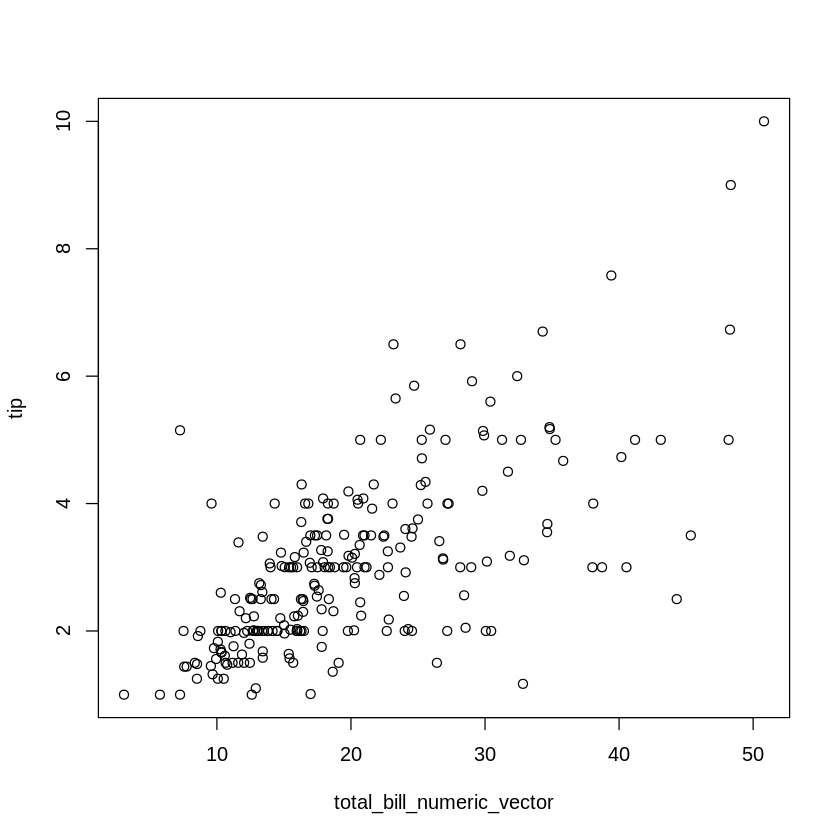

In [ ]:
# Solution_question_9
plot(total_bill_numeric_vector, tip)

## Question_10: _Produce a scatterplot showing the total bill cost on the horizontal axis and the tip amount on the vertical axis, color coded by day of the week.

In [ ]:
print(DAYS)

  [1] Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri 
 [16] Fri  Fri  Fri  Fri  Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur
 [31] Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur Fri  Fri  Fri  Fri 
 [46] Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Thur Thur Thur Thur
 [61] Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur Thur
 [76] Thur Thur Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat 
 [91] Sun  Sun  Sun  Sun  Sun  Sun  Sun  Sun  Sun  Sun  Sun  Sun  Thur Thur Thur
[106] Thur Thur Thur Thur Thur Thur Thur Fri  Fri  Fri  Fri  Fri  Sat  Sat  Sat 
[121] Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat 
[136] Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat  Sat 
[151] Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri 
[166] Fri  Fri  Fri  Thur Thur Thur Thur Fri  Fri  Fri  Fri  Fri  Fri  Fri  Fri 
[181] Fri  Fri  Fri  Fri  Fr

In [ ]:
print(table(DAYS))

DAYS
 Sun Thur  Fri  Sat 
  19   87   76   62 


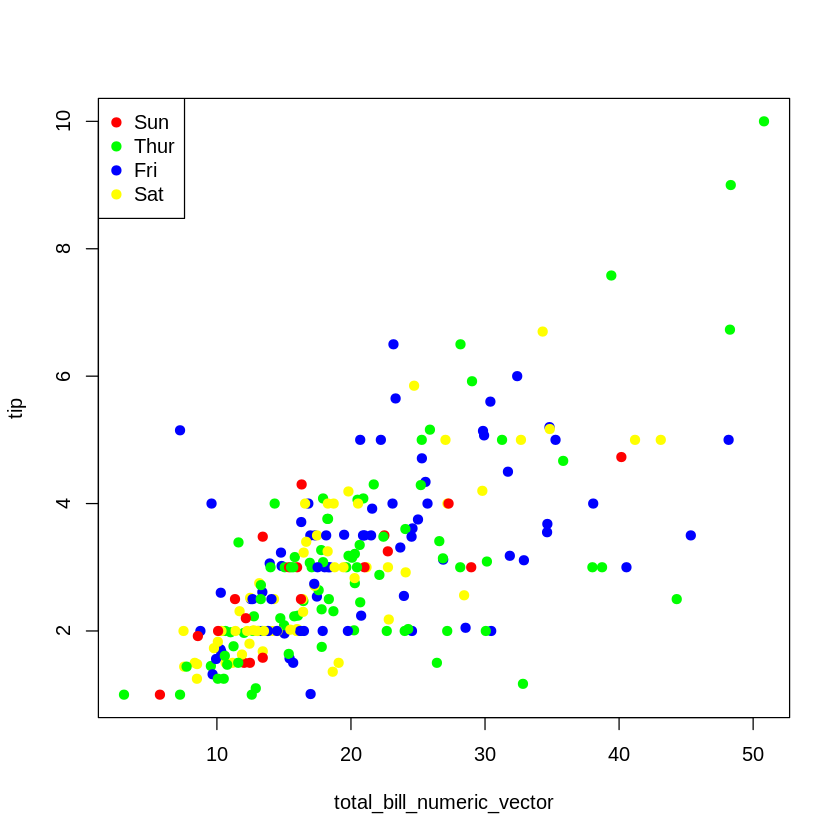

In [ ]:
# Solution_Question_10
plot(total_bill_numeric_vector, tip, pch =19, col=c("red","green","blue","yellow")[DAYS])
legend("topleft",legend=levels(DAYS), pch=19,col=c("red","green","blue", "yellow"))